# Rules Extraction

# Statics

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.utils import Bunch
from sklearn.datasets._base import load_csv_data
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import csv

## Load Dataset

In [2]:
# Load Dataset
#iris
#dataset = load_iris()
target_value_name = 'class'

# Mushrooms
filename = 'segmentation'
target_true = 'BRICKFACE'
target_false = 'REMAINDER'
list_of_continuous_columns = ["REGION-CENTROID-COL", "REGION-CENTROID-ROW", "VEDGE-MEAN", "VEDGE-SD", "HEDGE-MEAN",
                              "HEDGE-SD", "INTENSITY-MEAN", "RAWRED-MEAN", "RAWBLUE-MEAN", "RAWGREEN-MEAN",
                              "EXRED-MEAN", "EXBLUE-MEAN", "EXGREEN-MEAN", "VALUE-MEAN", "SATURATION-MEAN",
                              "HUE-MEAN"]
list_of_continuous_columns = [sub.replace('-', '_').replace(' ', '') for sub in list_of_continuous_columns]
number_of_divisions = 5
test_size = 0.1


data_file_name = f'../../../../data/{filename}.csv'
pandas_dataset = pd.read_csv(data_file_name)
pandas_dataset = pandas_dataset.replace('?', 'unknown')
pandas_dataset = pandas_dataset.dropna()
pandas_dataset.columns = [sub.replace('%', '') for sub in pandas_dataset.columns]
target_value_name = pandas_dataset.columns[-1]


pandas_dataset[target_value_name] = pandas_dataset[target_value_name].map({target_false: 0, target_true: 1})
pandas_dataset.columns = [sub.replace('-', '_').replace(' ', '').replace('class', 'target_value') for sub in pandas_dataset.columns]
target_value_name = pandas_dataset.columns[-1]
feature_names = pandas_dataset.columns[0:-1]


#dataset.feature_names = [sub.replace(' ', '').replace('(cm)', '') for sub in dataset.feature_names]

pandas_dataset.head()

,REGION_CENTROID_COL,REGION_CENTROID_ROW,REGION_PIXEL_COUNT,SHORT_LINE_DENSITY_5,SHORT_LINE_DENSITY_2,VEDGE_MEAN,VEDGE_SD,HEDGE_MEAN,HEDGE_SD,INTENSITY_MEAN,RAWRED_MEAN,RAWBLUE_MEAN,RAWGREEN_MEAN,EXRED_MEAN,EXBLUE_MEAN,EXGREEN_MEAN,VALUE_MEAN,SATURATION_MEAN,HUE_MEAN,target_value
0,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,1
1,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,1
2,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,1
3,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,1
4,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,1


# One Hot Encoding

In [3]:
from notebooks.IPRules.test_utils import continuous_to_discrete_column, one_hot_encode_dataframe

pandas_dataset = continuous_to_discrete_column(pandas_dataset,list_of_continuous_columns, number_of_divisions)
encoded_pandas_dataset, encoded_feature_names = one_hot_encode_dataframe(pandas_dataset, feature_names)
encoded_pandas_dataset.head()

,REGION_CENTROID_COL_High,REGION_CENTROID_COL_Low,REGION_CENTROID_COL_Medium,REGION_CENTROID_COL_VeryHigh,REGION_CENTROID_COL_VeryLow,REGION_CENTROID_ROW_High,REGION_CENTROID_ROW_Low,REGION_CENTROID_ROW_Medium,REGION_CENTROID_ROW_VeryHigh,REGION_CENTROID_ROW_VeryLow,...,SATURATION_MEAN_Low,SATURATION_MEAN_Medium,SATURATION_MEAN_VeryHigh,SATURATION_MEAN_VeryLow,HUE_MEAN_High,HUE_MEAN_Low,HUE_MEAN_Medium,HUE_MEAN_VeryHigh,HUE_MEAN_VeryLow,target_value
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [4]:
X = encoded_pandas_dataset[encoded_feature_names]
y = encoded_pandas_dataset[target_value_name]

encoded_dataset = Bunch(
        data=X.to_numpy(),
        target=y.to_numpy(),
        target_names=target_value_name,
        feature_names=X.columns
)

#X_display = pandas_dataset.drop([target_value_name], axis=1)
#y_display = pandas_dataset[target_value_name]

#encoded_pandas_dataset = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']], columns= list(dataset['feature_names']) + ['target'])
#encoded_pandas_dataset.head()


# Divide dataset

In [5]:
#Define dataset
X_train, X_test, y_train, y_test = train_test_split(encoded_dataset.data, encoded_dataset.target, test_size=test_size, random_state=1)
encoded_train_pandas_dataset = pd.DataFrame(data= np.c_[X_train, y_train], columns= list(encoded_dataset['feature_names']) + [target_value_name])
encoded_test_pandas_dataset = pd.DataFrame(data= np.c_[X_test, y_test], columns= list(encoded_dataset['feature_names']) + [target_value_name])
print()
print('Sizes (without target):')
print(f'Original size {encoded_dataset.data.shape}')
print(f'Train size {X_train.shape}')
print(f'Test size {X_test.shape}')


Sizes (without target):
Original size (210, 81)
Train size (189, 81)
Test size (21, 81)


## Define Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer, recall_score, accuracy_score

# Define scorer
ensemble = RandomForestClassifier(criterion="gini")
ensemble.fit(X_train, y_train)

RandomForestClassifier()

## iPRules

->Extract feature importance list


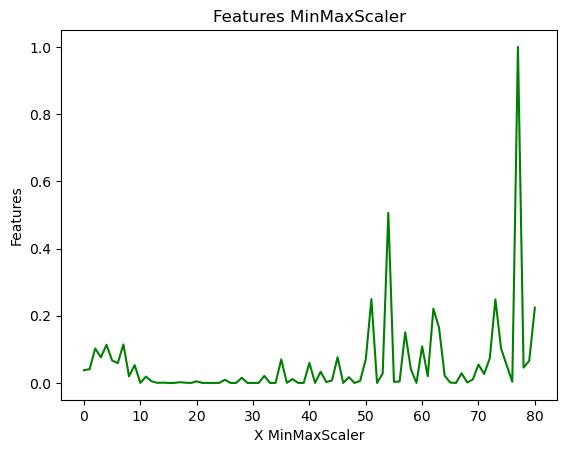

	 Original features 81
	 Selected features 42
	 Percentage of selected rules: 51.851851851851855 %
->Generate new tree based on list
Elapsed time to compute the binary_tree_generator: 26.374 seconds
->Generate obtained patterns tree
Elapsed time to compute the obtain_pattern_list_of_valid_nodes_with_pvalue: 0.098 seconds
->Categorize patterns
Elapsed time to compute the categorize_patterns: 0.087 seconds


In [7]:
from iPRules.iPRules import iPRules

# initialize
rules = iPRules(
                feature_names=encoded_dataset.feature_names,
                target_value_name = encoded_dataset.target_names,
                display_features = True,
                display_logs = True,
                chi_square_percent_point_function = 0.95,
                scale_feature_coefficient = 0.01,
                min_accuracy_coefficient = 0.9,
                min_number_class_per_node = 3
            )
# Fit model
rules.fit(encoded_train_pandas_dataset, ensemble.feature_importances_)

# Print Model

In [8]:
# DISPLAY DESCRIPTION
#print(rules.description())
# DISPLAY ALL RULES
print(rules)

> ++++++++++++++++++++++++++++
> iPRules --  Number of Rules 8:
> ++++++++++++++++++++++++++++
> ------------------------------
 ** Target value: 1 ** Target: 16 ** Total: 16 ** Accuracy: 1.0 ** Complexity: 1 ** Chi2 critical_value: 3.841458820694124 ** P_value: 1.1792331556306833e-23
	 Query: HUE_MEAN_Low == 1
> ------------------------------
> ------------------------------
 ** Target value: 0 ** Target: 58 ** Total: 58 ** Accuracy: 1.0 ** Complexity: 4 ** Chi2 critical_value: 3.841458820694124 ** P_value: 0.022970786500092946
	 Query: HUE_MEAN_Low == 0.0  &  EXRED_MEAN_VeryHigh == 0.0  &  EXRED_MEAN_High == 1.0  &  SATURATION_MEAN_Medium == 0
> ------------------------------
> ------------------------------
 ** Target value: 0 ** Target: 13 ** Total: 13 ** Accuracy: 1.0 ** Complexity: 6 ** Chi2 critical_value: 3.841458820694124 ** P_value: 0.0005800891819825593
	 Query: HUE_MEAN_Low == 0.0  &  EXRED_MEAN_VeryHigh == 1.0  &  EXRED_MEAN_High == 0.0  &  SATURATION_MEAN_Medium == 0.0  &

# Predict

In [9]:
# ENSEMBLE
y_pred_test_ensemble = ensemble.predict(X_test)

# RULES
y_pred_test_rules = rules.predict(X_test)

In [10]:
# CATEGORIZABLES
np_array_rules = np.array(y_pred_test_rules)
#not_filter_indices = np.where(np.logical_and(np_array_rules != 0, np_array_rules!=1))[0]
filter_indices = np.where(np_array_rules != None)[0]


np_filterred_y_test = np.array(y_test)[filter_indices]
np_filterred_y_pred_test_ensemble = np.array(y_pred_test_ensemble)[filter_indices]
np_filterred_y_pred_test_rules = np.array(y_pred_test_rules)[filter_indices]
# CHANGE FORMAT IN ORDER TO NOT HAVE PROBLEMS
np_filterred_y_pred_test_rules = np_filterred_y_pred_test_rules.astype('int64')


print(f'DATASET TEST: {len(y_test)}')
print(f'DATASET TEST categorizable: {len(np_filterred_y_test)}')
print('Cobertura:',str("{:.2f}".format(100*(len(np_filterred_y_pred_test_rules)/len(y_test))))+'%')

ensemble_accuracy = metrics.accuracy_score(np_filterred_y_test, np_filterred_y_pred_test_ensemble)
print('RF accuracy:',str("{:.2f}".format(100*ensemble_accuracy))+'%')
ensemble_accuracy = metrics.f1_score(np_filterred_y_test, np_filterred_y_pred_test_ensemble)
print('RF F1-score:',str("{:.2f}".format(100*ensemble_accuracy))+'%')
rules_accuracy = metrics.accuracy_score(np_filterred_y_test, np_filterred_y_pred_test_rules)
print('Rules Accuracy:',str("{:.2f}".format(100*rules_accuracy))+'%')
rules_accuracy = metrics.f1_score(np_filterred_y_test, np_filterred_y_pred_test_rules)
print('Rules F1-score:',str("{:.2f}".format(100*rules_accuracy))+'%')
rules_accuracy = metrics.roc_auc_score(np_filterred_y_test, np_filterred_y_pred_test_rules)
print('Rules roc_auc_score:',str("{:.2f}".format(100*rules_accuracy))+'%')


DATASET TEST: 21
DATASET TEST categorizable: 21
Cobertura: 100.00%
RF accuracy: 100.00%
RF F1-score: 100.00%
Rules Accuracy: 100.00%
Rules F1-score: 100.00%
Rules roc_auc_score: 100.00%


# CONFUSION MATRIX

In [11]:

confusion_matrix = metrics.confusion_matrix(np_filterred_y_test, np_filterred_y_pred_test_rules)
print(confusion_matrix)
confusion_matrix(np_filterred_y_test, np_filterred_y_pred_test_rules, labels=encoded_dataset.feature_names)

[[19  0]
 [ 0  2]]


TypeError: 'numpy.ndarray' object is not callable

# SHAP explainer

In [ ]:
import shap

# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(ensemble)

# Evaluate SHAP values
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_train, feature_names=encoded_dataset.feature_names)